## Springboard Data Science Track Capstone Project 2
### Music Genre Classification from Audio Samples
### by Morgan Fry
### Data Exploration and Analysis notebook


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd

import pickle
import seaborn as sns

First, let's look at the distribution of the genre labels:

In [10]:
genres=pd.read_csv('data/genres.csv', index_col=0)

In [60]:
genres.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


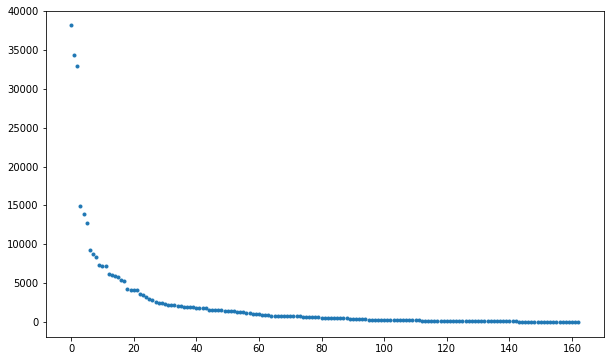

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(genres)),genres['#tracks'].sort_values(ascending=False),marker='.')
plt.show()

#### Let's look at the relevant features from one audio clip

In [82]:
audio_paths=pickle.load(open("saved/audio_paths.p","rb"))

In [102]:
ipd.Audio(audio_paths[18045])

### TBA: explain which features we'll be using and what they mean to a listener

In [103]:
#look at a 1-second clip
x, sr = librosa.load(audio_paths[18045],offset=10,duration=1)

/home/morganfry/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


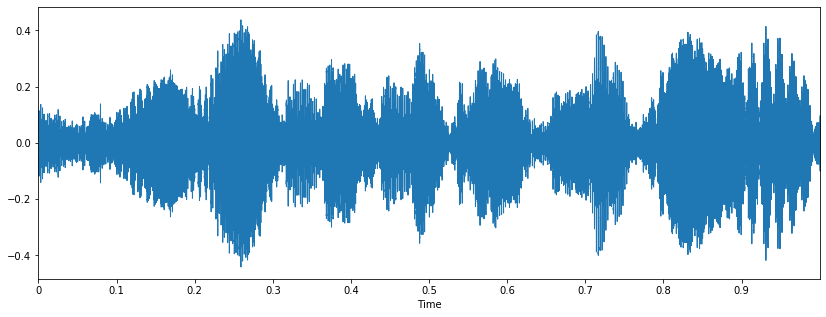

In [104]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

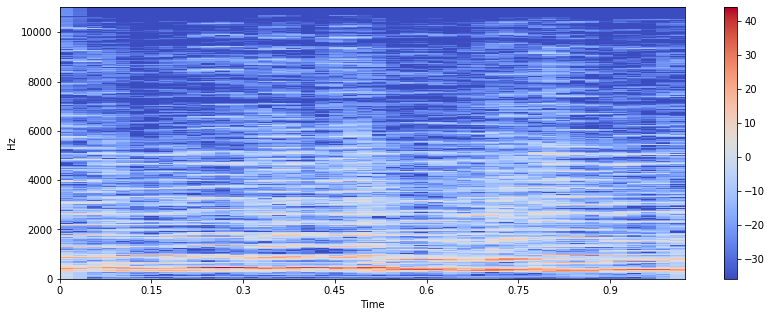

In [105]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

Musical instruments have most of their sound in the 50-2000 Hz range, and as we can see there is a lot more information in the lower frequencies, so looking at the log of the frequencies will be more instructive.

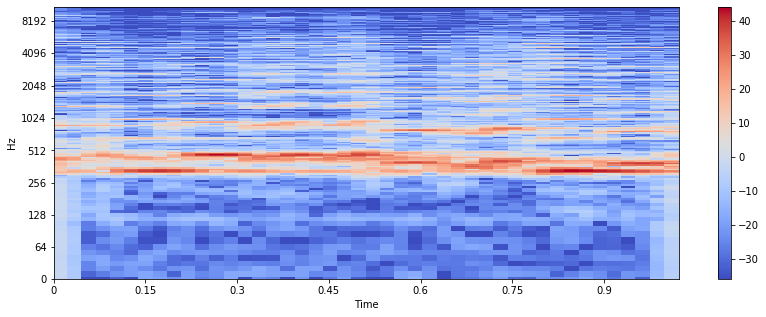

In [106]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In this case it is a solo violin, so the open strings are from about 200Hz to about 700Hz.

In [119]:
#spectral centroid
centroid=librosa.feature.spectral_centroid(x, sr=sr)
centroid.shape

(1, 44)

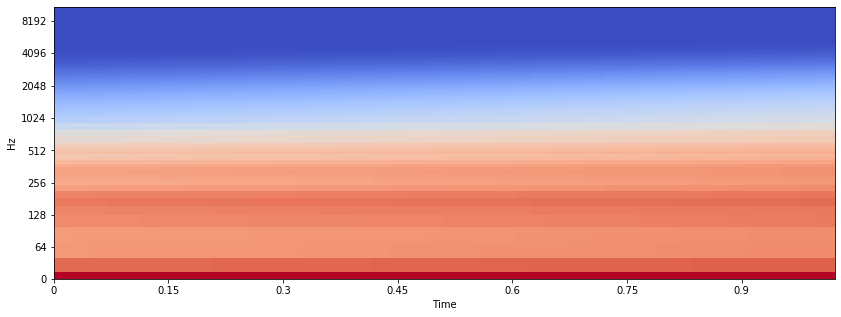

In [114]:
#tempogram
tgram=librosa.feature.tempogram(x, sr=sr)

plt.figure(figsize=(14,5))
librosa.display.specshow(tgram, sr=sr, x_axis='time', y_axis='log')
plt.show()

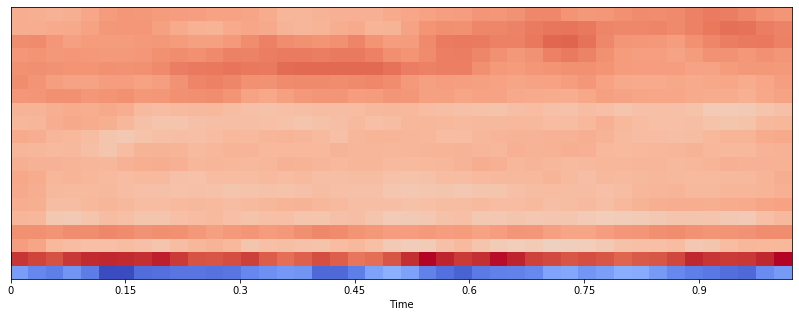

In [115]:
#MFCCs
mfccs = librosa.feature.mfcc(x, sr=sr)

plt.figure(figsize=(14,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In [110]:
#explaing chroma

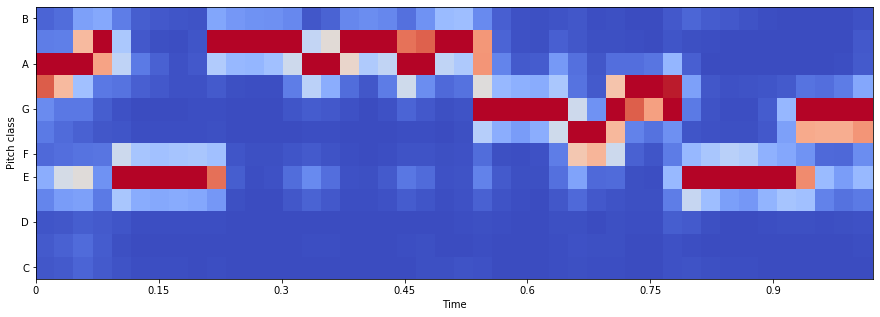

In [111]:
#chroma stft

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()